# NAKAMA8

## Anggota
1. Septasia Dwi
2. Aprillia Ika
3. Mario Marfelly
4. Arum Puspita Sari
5. Stella Indranawaski
6. Aditya Noeleka

## 1. Data Exploration (Mengunduh data, meng-explore atribut dan target output)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
matplotlib.style.use('ggplot')

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#ganti lokasi sesuai tempat dataset masing-masing
#Caranya:
#1. Klik kanan dataset di folder ini, pilih 'Add Shortcut to Drive'
#2. Pilih folder tempat dataset mau ditaruh
#3. Copy path dari folder tempat yg tadi udah dipilih

#df_train = pd.read_csv('/content/drive/MyDrive/Rakamin/final project/health insurance/train.csv')
data = pd.read_csv('/content/gdrive/MyDrive/Rakamin_DS/Final Project/train.csv') #anggi
#df_train.head()

In [ ]:
#data = pd.read_csv('health_insurance_train.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
data['Driving_License'] = data['Driving_License'].apply(str)
data['Region_Code'] = data['Region_Code'].apply(str)
data['Previously_Insured'] = data['Previously_Insured'].apply(str)
data['Policy_Sales_Channel'] = data['Policy_Sales_Channel'].apply(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 34.9+ MB


In [ ]:
numerical = ['id', 'Age', 'Annual_Premium', 'Vintage', 'Response']
categorical = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Region_Code', 'Policy_Sales_Channel', 'Driving_License', 'Previously_Insured']
[data[c].describe() for c in categorical]

[count     381109
 unique         2
 top         Male
 freq      206089
 Name: Gender, dtype: object, count       381109
 unique           3
 top       1-2 Year
 freq        200316
 Name: Vehicle_Age, dtype: object, count     381109
 unique         2
 top          Yes
 freq      192413
 Name: Vehicle_Damage, dtype: object, count     381109
 unique        53
 top         28.0
 freq      106415
 Name: Region_Code, dtype: object, count     381109
 unique       155
 top        152.0
 freq      134784
 Name: Policy_Sales_Channel, dtype: object, count     381109
 unique         2
 top            1
 freq      380297
 Name: Driving_License, dtype: object, count     381109
 unique         2
 top            0
 freq      206481
 Name: Previously_Insured, dtype: object]

In [ ]:
data.describe() 
#to check descriptive statistics for intergers data

,id,Age,Annual_Premium,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,30564.389581,154.347397,0.122563
std,110016.836208,15.511611,17213.155057,83.671304,0.327936
min,1.000000,20.000000,2630.000000,10.000000,0.000000
25%,95278.000000,25.000000,24405.000000,82.000000,0.000000
50%,190555.000000,36.000000,31669.000000,154.000000,0.000000
75%,285832.000000,49.000000,39400.000000,227.000000,0.000000
max,381109.000000,85.000000,540165.000000,299.000000,1.000000


Annual_Premium memiliki nilai rentang yang sangat jauh (min = 2630 dan max = 540165) dengan nilai Q3 = 39400. <br>
Dari data tersebut dapat disimpulkan bahwa Annual_Premium memiliki distribusi yang skewed ke kanan (positively skewed)

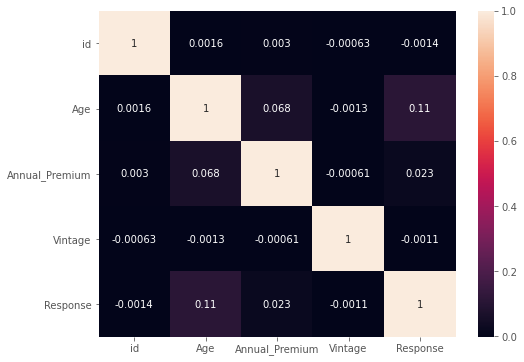

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data.isna().sum()

#to check the missing value. results : no missing value

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### KESIMPULAN
* Data type : all interger except gender, vehicle_age, and vehicle_damage
* No null data in every section
* Total data : 381109
* No missing value
* Atribut/Fitur/Variabel Independen/Variabel Bebas dalam data terdiri dari ID, Gender, Age, Driver License, Region Code, Previously Insured, Vehicle Age, Vehicle Damage, Annual Premium, Policy Sales Channel, dan Vintage
* Target output yaitu `Response` sebagai variabel target / variabel dependent karena variabel `Response`adalah hasil prediksi dari variabel bebas lainnya dan hasilnya akan selalu berubah menyesuaikan variabel bebas.

<AxesSubplot:xlabel='Gender', ylabel='count'>

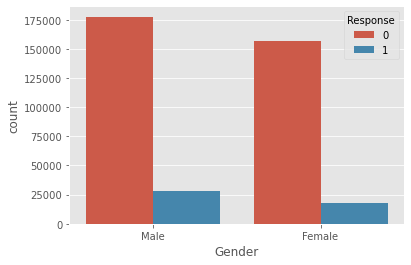

In [ ]:
sns.countplot(data=data,x='Gender',hue='Response')

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

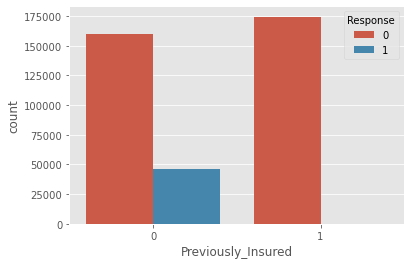

In [ ]:
sns.countplot(data=data,x='Previously_Insured',hue='Response')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

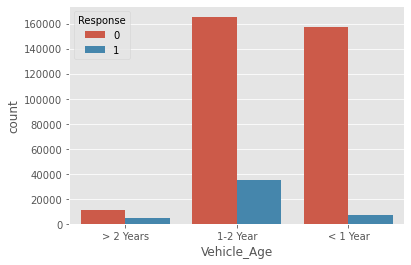

In [ ]:
sns.countplot(data=data,x='Vehicle_Age',hue='Response')

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

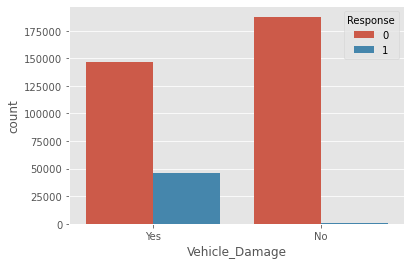

In [ ]:
sns.countplot(data=data,x='Vehicle_Damage',hue='Response')

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

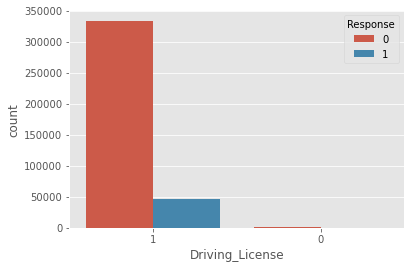

In [ ]:
sns.countplot(data=data,x='Driving_License',hue='Response')

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

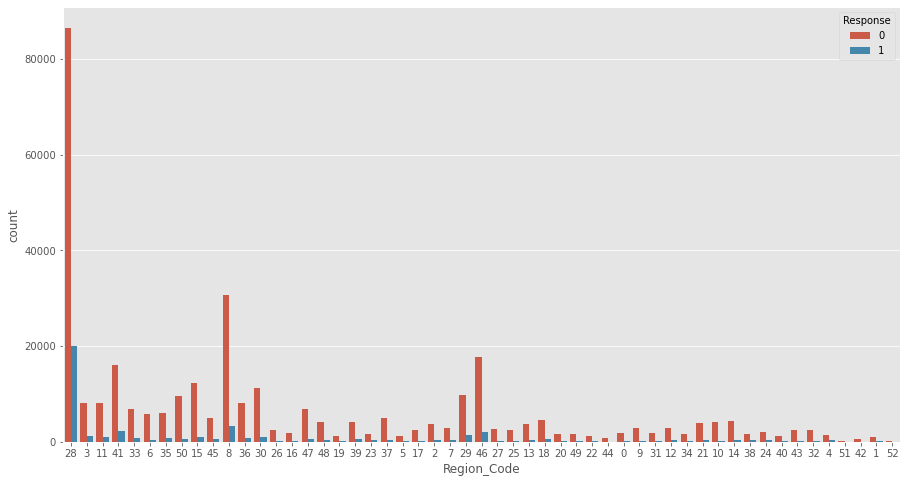

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Region_Code',hue='Response')

Jumlah response tertinggi berada di Region Code = 28

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

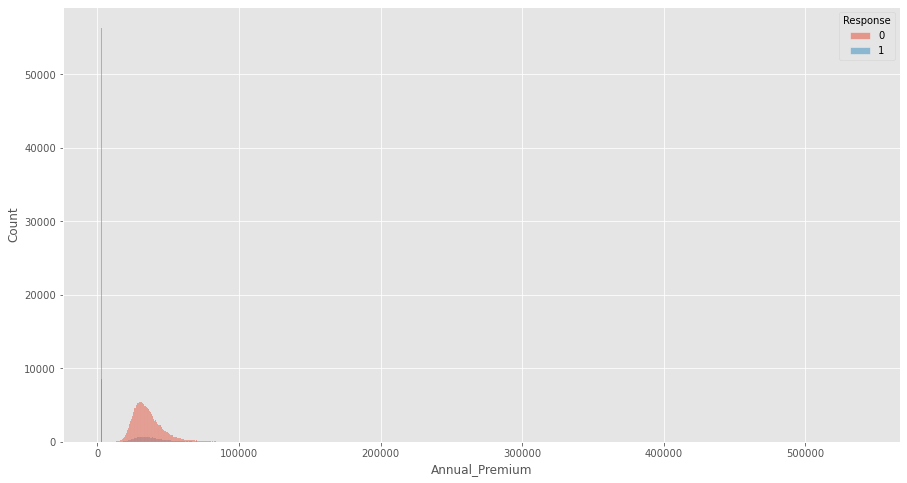

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Annual_Premium',hue='Response')

Annual_Premium memiliki distribusi yang skew ke kanan (positively skewed)

<AxesSubplot:xlabel='Age', ylabel='Count'>

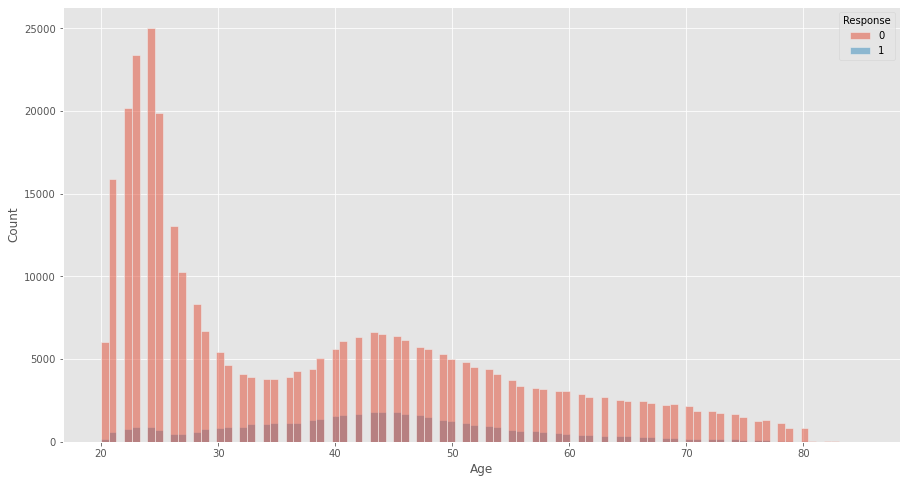

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Age',hue='Response')

Distribusi umur memiliki jumlah yang tinggi pada rentang 20-25

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

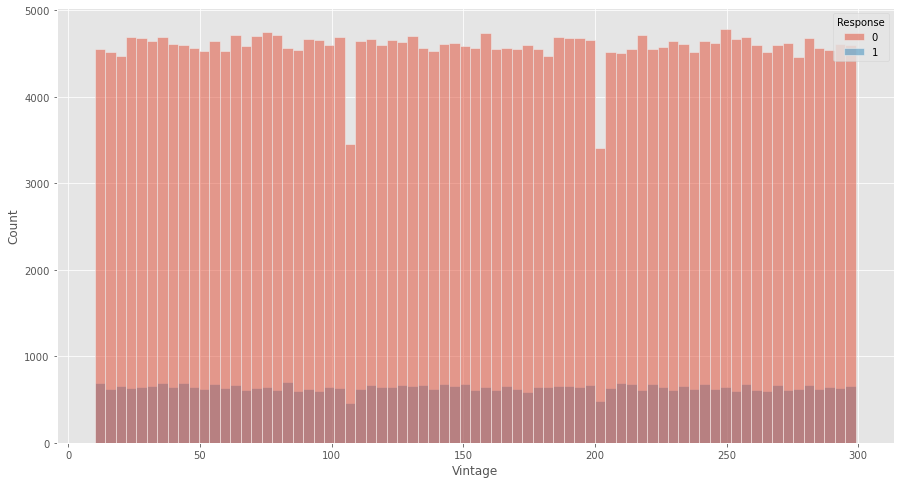

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Vintage',hue='Response')

Vintage memiliki distribusi yang hampir sama

<AxesSubplot:xlabel='Previously_Insured', ylabel='Age'>

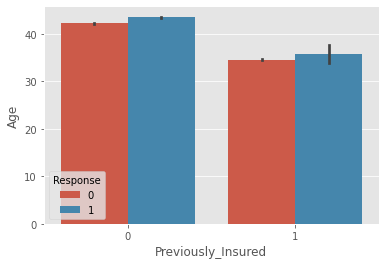

In [ ]:
sns.barplot(x="Previously_Insured", y="Age", data=data, hue ='Response')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Age'>

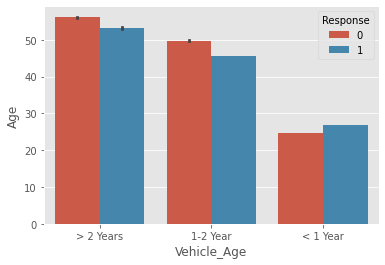

In [ ]:
sns.barplot(x="Vehicle_Age", y="Age", data=data, hue ='Response')

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Age'>

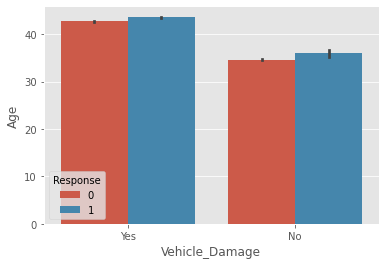

In [ ]:
sns.barplot(x="Vehicle_Damage", y="Age", data=data, hue ='Response')

<AxesSubplot:xlabel='Previously_Insured', ylabel='Age'>

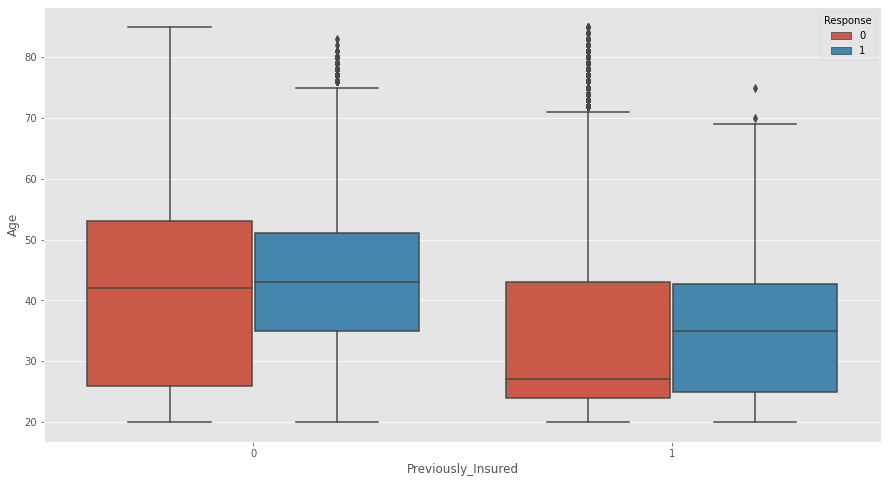

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Previously_Insured", y="Age", data=data, hue='Response')

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Age'>

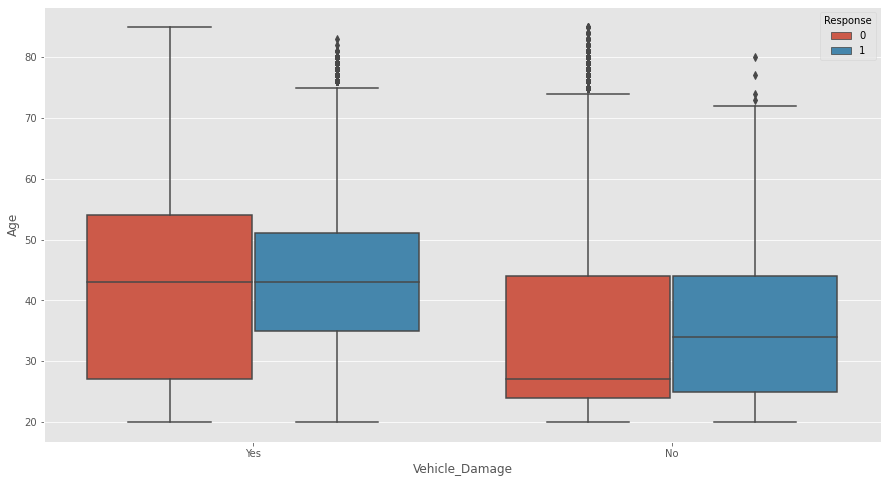

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Vehicle_Damage", y="Age", data=data, hue='Response')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Age'>

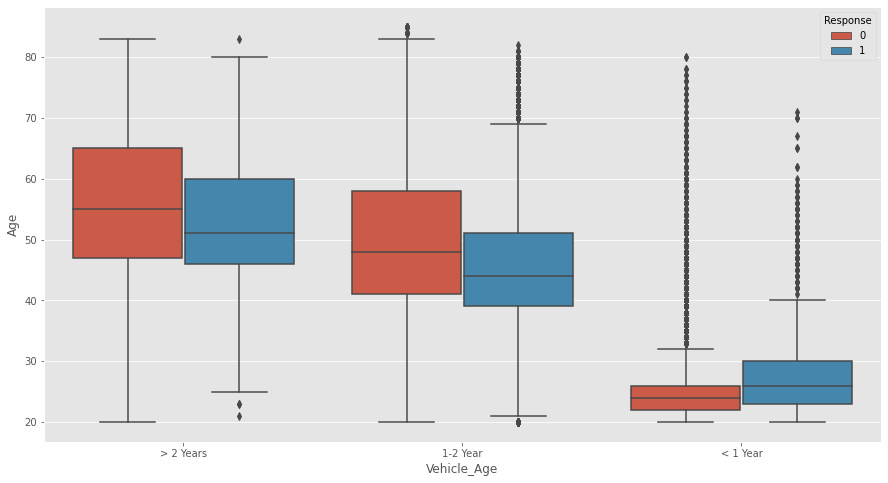

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Vehicle_Age", y="Age", data=data, hue='Response')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

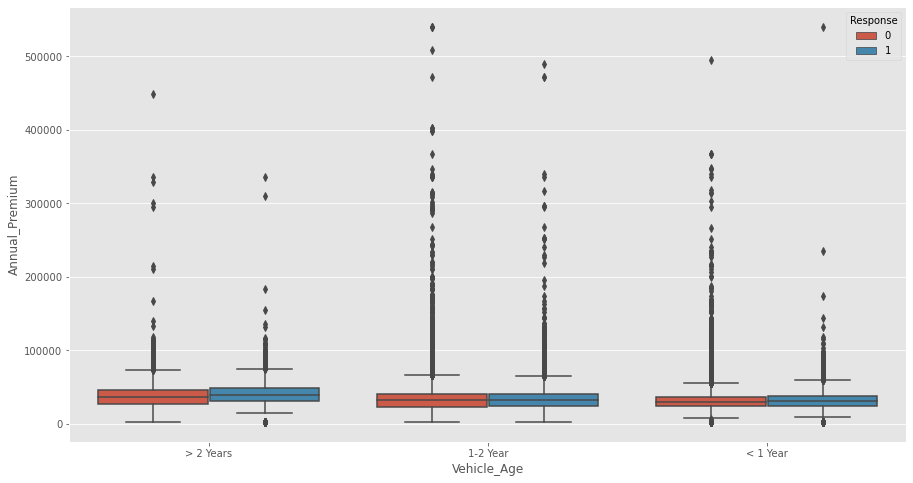

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Vehicle_Age", y="Annual_Premium", data=data, hue ='Response')

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Annual_Premium'>

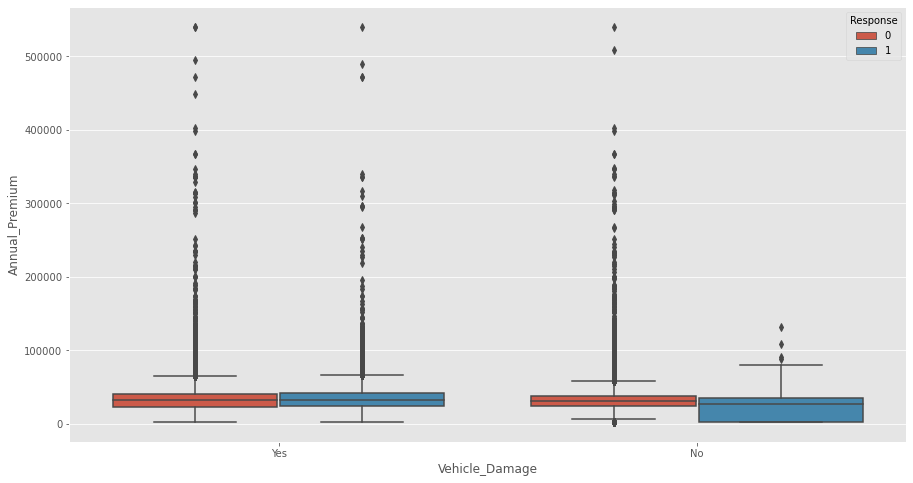

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Vehicle_Damage", y="Annual_Premium", data=data, hue ='Response')

<AxesSubplot:xlabel='Previously_Insured', ylabel='Annual_Premium'>

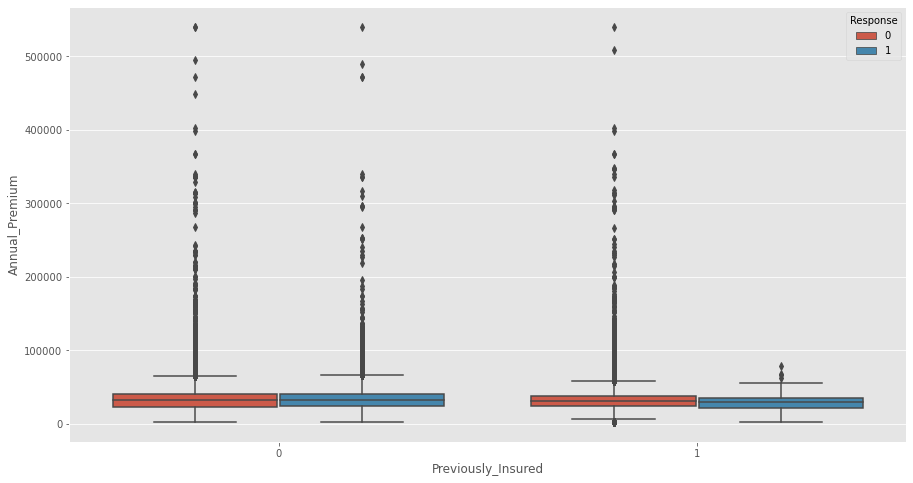

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Previously_Insured", y="Annual_Premium", data=data, hue ='Response')

Boxplot Vehicle_Age, Vehicle_Damage, dan Previously_Insured vs Annual_Premium menandakan bahwa terdapat outlier untuk Annual_Premium

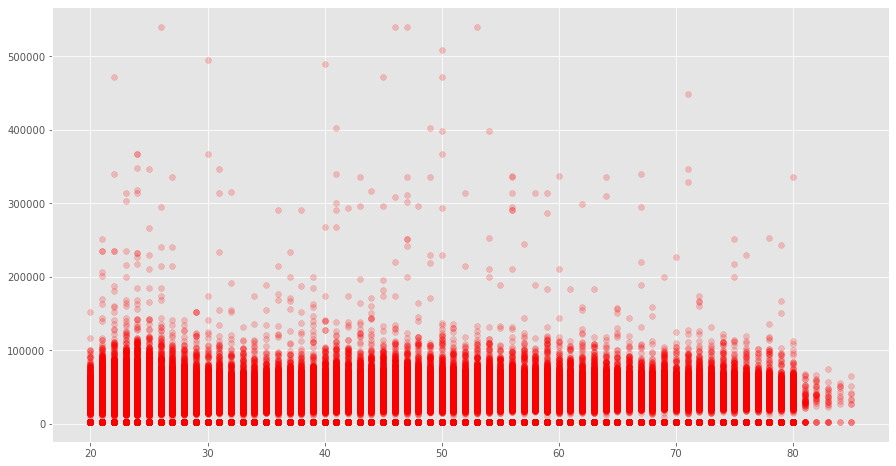

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x = data['Age'], y = data['Annual_Premium'], c='r',alpha = 0.2) 

<AxesSubplot:xlabel='Annual_Premium'>

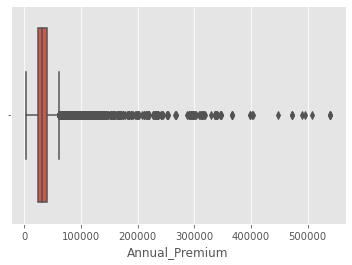

In [ ]:
sns.boxplot(x="Annual_Premium",data = data)

<AxesSubplot:xlabel='Vintage'>

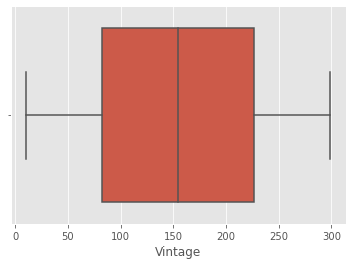

In [ ]:
sns.boxplot(x="Vintage",data = data)

## 2. Exploratory Data Analysis (Setiap feature yang disiapkan dicek distribusinya terhadap variabel target)

 #### Melihat sebaran nilai pada data yang ada dengan ringkasan statistik dari setiap kolom di dataset untuk memperoleh gambaran besar keadaan data.

In [ ]:
data.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### Untuk menentukan kira-kira attribut mana yang cukup baik untuk memprediksi target, dilakukan Multivariate Analysis untuk menganalisis beberapa kolom sekaligus untuk mencari hubungan antar kolom. Disini kami menggunakan Correlation Heatmap.

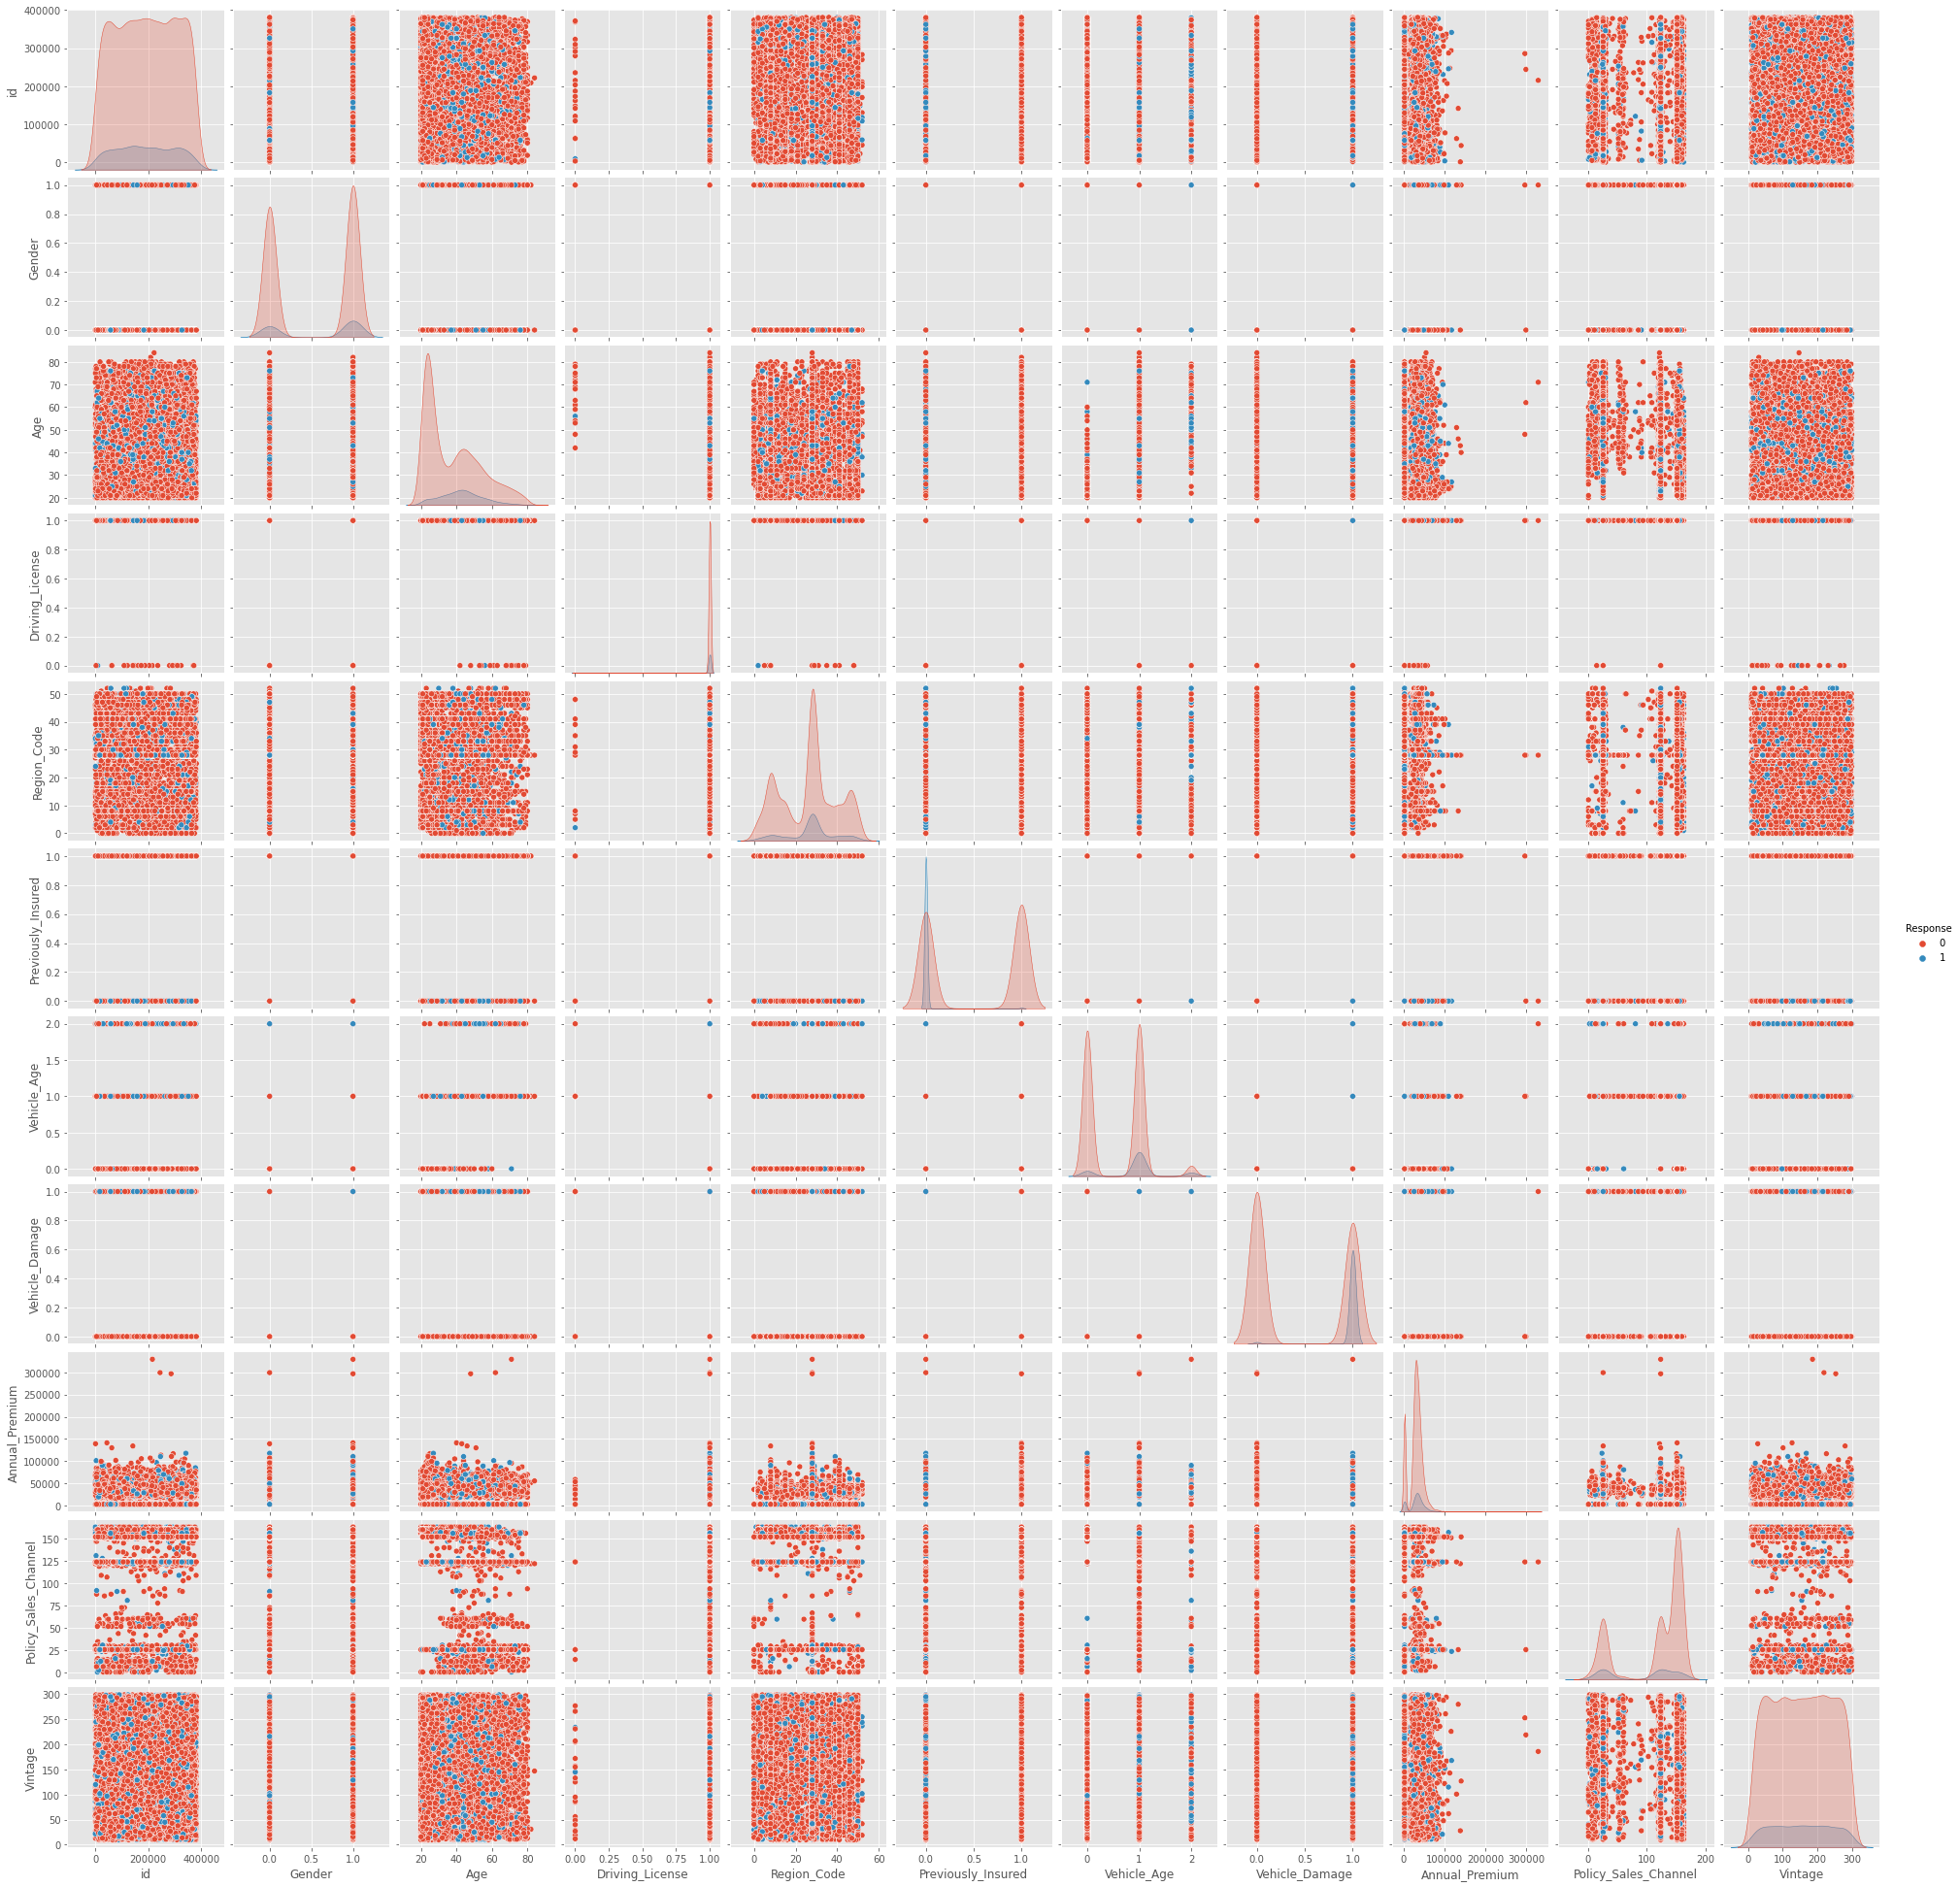

In [ ]:
sns.pairplot(data.sample(10000), hue = 'Response')

#### Hasil Correlation Heatmap:

by loading this heat map, data that will not be used as variables in this project are (heatmap score <0.2 or >-0.2) and >0.8 or <-0.8 because it's considered as redundant.
1. id
2. gender
3. driving_lisence
4. region_code
5. annual premium
6. vintage

variables to be checked later based on this heat map:
1. age vs previously insured (-0.25)
2. age vs vehicle_age (0.77)
3. age vs vehicle_damage (0.27)
4. age vs policy_sales_channel (-0.58)
5. previously insured vs vehicle_age (-0.38)
6. previously insured vs policy_sales_channel (0.22)
7. previously insured vs response (-0.34)
8. vehicle_age vs vehicle_damage (0.4)
9. vehicle_age vs policy_sales_channel (-0.55)
10. vehicle_age vs response (0.22)
11. vehicle_damage vs policy_sales_channel (-0.22)
12. vehicle_damage vs response (0.35)

In [ ]:
m = data['Age']

In [ ]:
print('#Age#')
print('variance: ', m.var())
print('standard deviation: ',m.std())
print('Inter Quartile Range: ',m.quantile(0.75)-m.quantile(0.25))
print('Range:',m.max()-m.min())

#Age#
variance:  240.6100763765522
standard deviation:  15.511611018090681
Inter Quartile Range:  24.0
Range: 65


In [ ]:
data.loc[data['Age']<30, 'age_group'] = 'under 30'
data.loc[data['Age'].between(31,40), 'age_group'] = '30-40'
data.loc[data['Age'].between(41,50), 'age_group'] = '40-50'
data.loc[data['Age'].between(51,60), 'age_group'] = '50-60'
data.loc[data['Age'].between(61,70), 'age_group'] = '60-70'
data.loc[data['Age']>70, 'age_group'] = 'above 70'

In [ ]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,40-50
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,above 70
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,40-50
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,under 30
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0,above 70
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0,NaN
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0,under 30
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0,60-70


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  object
 4   Region_Code           381109 non-null  object
 5   Previously_Insured    381109 non-null  object
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  object
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
 12  age_group             374851 non-null  object
dtypes: int64(5), object(8)
memory usage: 37.8+ MB


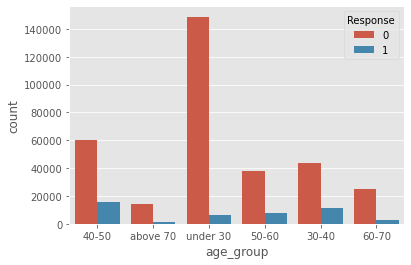

In [ ]:
sns.countplot(data=data, x='age_group',hue='Response');

In [ ]:
data.groupby('age_group')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
30-40,55163.0,35.774704,2.967165,31.0,33.0,36.0,38.0,40.0
40-50,75941.0,45.283101,2.800477,41.0,43.0,45.0,48.0,50.0
50-60,45305.0,54.987948,2.864268,51.0,52.0,55.0,57.0,60.0
60-70,27838.0,65.196278,2.873759,61.0,63.0,65.0,68.0,70.0
above 70,15401.0,74.802480,2.816408,71.0,72.0,74.0,77.0,85.0
under 30,155203.0,24.080823,2.348279,20.0,22.0,24.0,26.0,29.0


In [ ]:
data1 = data.groupby(by=['Region_Code']).count()

In [ ]:
data1

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
Region_Code,,,,,,,,,,,,
0,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2001
1,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,994
10,4374,4374,4374,4374,4374,4374,4374,4374,4374,4374,4374,4286
11,9232,9232,9232,9232,9232,9232,9232,9232,9232,9232,9232,9048
12,3198,3198,3198,3198,3198,3198,3198,3198,3198,3198,3198,3136
13,4036,4036,4036,4036,4036,4036,4036,4036,4036,4036,4036,3984
14,4678,4678,4678,4678,4678,4678,4678,4678,4678,4678,4678,4597
15,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13063
16,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,1955


SyntaxError: invalid syntax (<ipython-input-62-670f9420f460>, line 4)